# • Generalization Error

# In Problems 1-3, we look at generalization bounds numerically. For $N > d_{vc}$, use the simple approximate bound $N^{d_{vc}}$ for the growth function $m_{\mathcal H}(N)$.

<br> <br>

# 1. For an $\mathcal H$ with $d_{vc} = 10$, if you want $95\%$ confidence that your generalization error is at most $0.05$, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

# <center>[a] $400,000$</center>
# <center>[b] $420,000$</center>
# <center>[c] $440,000$</center>
# <center>[d] $460,000$</center>
# <center>[e] $480,000$</center>

# Answer:
# <center> Original VC bound: $\epsilon ≤ \sqrt{\frac{8}{N}ln\frac{4m_{\mathcal H}(2N)}{δ}}$</center>
# <center> Solving for $N$:</center>
# <center> $N \geq \frac{8}{\epsilon^2}\bigl(ln\frac{(4((2N)^{d_{vc}}+1)}{δ}\bigr)$</center>
# <center> where: </center>
# <center> $d_{vc}=10$</center>
# <center> $1 - δ = 0.95 \to δ = 0.05$</center>
# <center> $\epsilon=0.05$</center>


In [1]:
import numpy as np

def get_N(dvc=10, delta=0.05, epsilon=0.05, initial_N=1000, tolerance = 1):
    """Uses recursion to iterate N until it converges within a tolerance
       
       Args: dvc = VC dimension
             delta = 1 - %confidence
             epsilon = generalization error
             initial_N = initial guess of sample size 
             tolerance = constraint at which to stop the recursion and state convergence
             
        Returns: N = Number of samples required
    
    """
    
    new_N = 8 / epsilon**2 * np.log((4 * ((2 * initial_N) ** dvc + 1)) / delta) # formula to generate new N
    
    if abs(new_N - initial_N) < tolerance: # Did it converge within a specific tolerance?
        return new_N
          
    else: # If so return N
        return get_N(dvc, delta, epsilon, new_N, tolerance) # If not iterate with new N

print("The closest numerical approximation of the minimum sample "\
      "size that the VC generalization bound predicts is {}".format(int(get_N())))

The closest numerical approximation of the minimum sample size that the VC generalization bound predicts is 452956


# Since $N = 452,956$ is the minimum required; the smallest answer that is greater than this minimum is:
# <center>[d] $460,000$</center>

<br><br><br>

# 2. There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1−δ$. Fix $d_{vc} = 50$ and $δ = 0.05$ and plot these bounds as a function of $N$. Which bound is the smallest for very large $N$, say $N = 10,000$? Note that [c] and [d] are implicit bounds in $\epsilon$.

# <center>[a] Original VC bound: $\epsilon ≤ \sqrt{\frac{8}{N}ln\frac{4m_{\mathcal H}(2N)}{δ}}$</center>

# <center>[b] Rademacher Penalty Bound: $\epsilon ≤ \sqrt{\frac{2ln(2Nm_{\mathcal H}(N))}{N}}+\sqrt{\frac{2}{N}ln\frac{1}{δ}} + \frac{1}{N}$</center>

# <center> [c] Parrondo and Van den Broek: $\epsilon ≤ \sqrt{\frac{1}{N}\bigl(2\epsilon + ln\frac{6m_{\mathcal H}(2N)}{δ}\bigr)}$</center>
# <center>$\downarrow$</center>
# <center>$\epsilon \leq \frac{1+\sqrt{Nln\bigl(\frac{6m_{\mathcal H}(2N)}{δ}\bigr) + 1}}{N}$ </center>

# <center>[d] Devroye: $\epsilon ≤ \sqrt{\frac{1}{2N}\bigl(4\epsilon(1+\epsilon) + ln\frac{4m_{\mathcal H}(N^2)}{δ}\bigr)}$</center>
# <center>$\downarrow$</center>
# <center>$\epsilon \leq \frac{2+\sqrt{2Nln\frac{4m_{\mathcal H}(N^2)}{δ} - 4ln\frac{4m_{\mathcal H}(N^2)}{δ}+4}}{2(N-2)}$</center>

# <center>[e] They are all equal.</center>


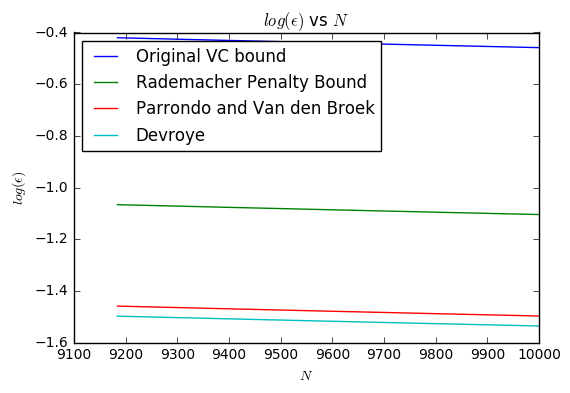

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

N = np.linspace(start=3, stop=10000, dtype="float64")
dvc = 50
delta = 0.05

# need to take log of mH prior due to overflow error
# from Devroye bound since 4mH(N^2) --> overflow
# since mH(N) = N^dvc + 1
# log(mH(N)) is approximately dvc * log(N)

logmH = lambda constant, N, dvc: dvc * np.log(constant * N)  # approximately log(mH) 

epsilon_VC = lambda N, dvc, delta: np.sqrt(8 / N * (np.log(4) + logmH(2, N, dvc) - np.log(delta)))

epsilon_rademacher = lambda N, dvc, delta: (np.sqrt(2 / N * (np.log(2 * N) + logmH(1, N, dvc))) + 
                                              np.sqrt(2 / N * np.log(1 / delta)) + 
                                              1 / N)

epsilon_parr_and_vdb = lambda N, dvc, delta: (1 + np.sqrt(N * (np.log(6) + logmH(2, N, dvc) - np.log(delta)) + 1)) / N

epsilon_devroye = lambda N, dvc, delta: (2 + 
                                         np.sqrt(2 * N * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) - 
                                                     4 * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) + 
                                                        4)
                                        ) / (2 * (N - 2))

epsilons = [epsilon_VC(N, dvc, delta), 
            epsilon_rademacher(N, dvc, delta),
            epsilon_parr_and_vdb(N, dvc, delta),
            epsilon_devroye(N, dvc, delta)]

bounds = ["Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye"]

plt.title("$log(\epsilon)$ vs $N$")
plt.xlabel("$N$")
plt.ylabel("$log(\epsilon)$")

for i in range(4):
    # take log of epsilon to zoom in!
    plt.plot(N[-5:], np.log(epsilons[i][-5:]))
    plt.legend(bounds,loc="best")
plt.show()

# From the graph above the Devroye has the smallest $\epsilon$ for very large N
# The answer is [d]



# 3. For the same values of $d_{vc}$ and $δ$ of Problem 2, but for small $N$, say $N = 5$, which bound is the smallest?

# <center>[a] Original VC bound: $\epsilon ≤ \sqrt{\frac{8}{N}ln\frac{4m_{\mathcal H}(2N)}{δ}}$</center>

# <center>[b] Rademacher Penalty Bound: $\epsilon ≤ \sqrt{\frac{2ln(2Nm_{\mathcal H}(N))}{N}}+\sqrt{\frac{2}{N}ln\frac{1}{δ}} + \frac{1}{N}$</center>

# <center> [c] Parrondo and Van den Broek: $\epsilon ≤ \sqrt{\frac{1}{N}\bigl(2\epsilon + ln\frac{6m_{\mathcal H}(2N)}{δ}\bigr)}$</center>

# <center>[d] Devroye: $\epsilon ≤ \sqrt{\frac{1}{2N}\bigl(4\epsilon(1+\epsilon) + ln\frac{4m_{\mathcal H}(N^2)}{δ}\bigr)}$</center>

# <center>[e] They are all equal.</center>


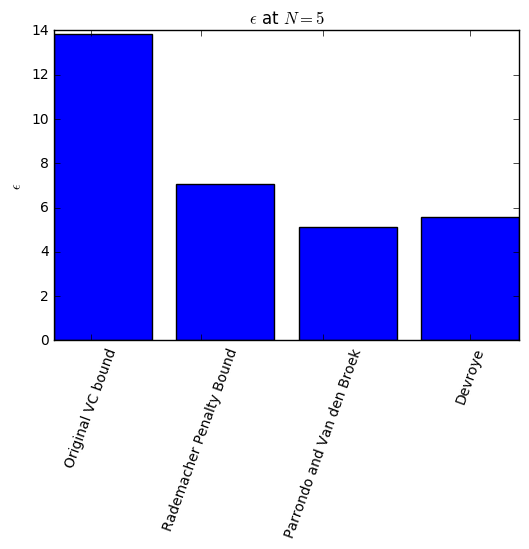

In [3]:
N = np.float(5)
epsilons = [epsilon_VC(N, dvc, delta), 
            epsilon_rademacher(N, dvc, delta),
            epsilon_parr_and_vdb(N, dvc, delta),
            epsilon_devroye(N, dvc, delta)]

bounds = ("Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye")

plt.title("$\epsilon$ at $N=5$")
plt.ylabel("$\epsilon$")
plt.xticks([0.3, 1.2, 2.2, 3.4], bounds, rotation=70)

plt.bar(np.arange(4), epsilons)
plt.show()

# From the graph above the Parrondo and Van den Broek bound has the smallest $\epsilon$ for very large N
# The answer is [c]

<br><br><br>

# • Bias and Variance

# Consider the case where the target function $f : [−1, 1] → \mathbb R$ is given by $f(x) = sin(πx)$ and the input probability distribution is uniform on $[−1, 1]$. Assume that the training set has only two examples (picked independently), and that the learning algorithm produces the hypothesis that minimizes the mean squared error on the examples.

<br><br>

# 4. Assume the learning model consists of all hypotheses of the form $h(x) = ax$. What is the expected value, $\bar g(x)$, of the hypothesis produced by the learning algorithm (expected value with respect to the data set)? Express your $\bar g(x)$ as $\hat ax$ , and round $\hat a$ to two decimal digits only, then match exactly to one of the following answers.

# <center>[a] $\bar g(x) = 0$</center>
# <center>[b] $\bar g(x) = 0.79x$</center>
# <center>[c] $\bar g(x) = 1.07x$</center>
# <center>[d] $\bar g(x) = 1.58x$</center>
# <center>[e] None of the above</center>

# Let's take a robust in approaching a solution to this problem.

# Let create the following $\mathcal H_i$s  (This will help us out in the later problems).

# <center>$\mathcal H_0: h(x) = b $ </center>
# <center>$\mathcal H_1: h(x) = ax $ </center>
# <center>$\mathcal H_2: h(x) = ax + b $ </center>
# <center>$\mathcal H_3: h(x) = ax^2 $ </center>
# <center>$\mathcal H_4: h(x) = ax^2 + b $ </center>


# Let's actually look at $\mathcal H_0$ first to understand how to define $h(x) = b$:

# Since hypothesis minimizes the mean squared error on two the examples, the best that the horizontal line $b$ can do is go through average value of points 1 and 2.

# <center>$\hat b = \frac{y_1 + y_2}{2}$</center>


# Let's solve this another way to get further insight:

# <center>minimize $E_{in}$</center>
# <center>$E_{in}=\sum_{i=1}^2\bigl(y_i - b\bigr)^2$</center>
# <center>$\frac{\partial E_{in}}{\partial b}=2\sum_{i=1}^2\bigl(y_i - b\bigr) = 0$</center>
# <center>$\frac{\partial E_{in}}{\partial b}=\sum_{i=1}^2y_i - \sum_{i=1}^2 b = 0$</center>
# <center>$y_1 + y_2 = 2b$</center>
# <center>$\hat b=\frac{y_1 + y_2}{2}$</center>

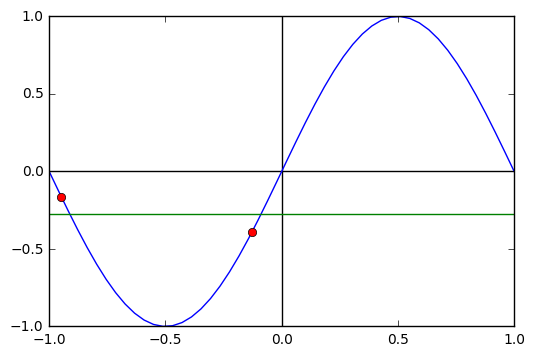

In [4]:
np.random.seed(seed=2)
x_range = np.linspace(-1, 1, 50)
x1 = np.random.uniform(-1, 1, 1)
y1 = np.sin(np.pi * x1)
x2 = np.random.uniform(-1, 1, 1)
y2 = np.sin(np.pi * x2)
b = np.mean(np.array([y1, y2]))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x_range, np.sin(np.pi * x_range))
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.axhline(b, color='green')


# Now let's actually look at  $\mathcal H_1: h(x)=ax$

# Let's solve this by minimizing $E_{in}$:

# <center>$E_{in}=\sum_{i=1}^2\bigl(y_i - ax_i\bigr)^2$</center>
# <center>$\frac{\partial E_{in}}{\partial a}=-2\sum_{i=1}^2x_i\bigl(y_i - ax_i\bigr) = 0$</center>
# <center>$\frac{\partial E_{in}}{\partial a}=\sum_{i=1}^2x_iy_i - a\sum_{i=1}^2 x_i^2 = 0$</center>
# <center>$x_1y_1 + x_1y_2 = a(x_1^2+x_2^2)$</center>
# <center>$\hat a=\frac{x_1y_1 + x_1y_2}{x_1^2+x_2^2}$</center>

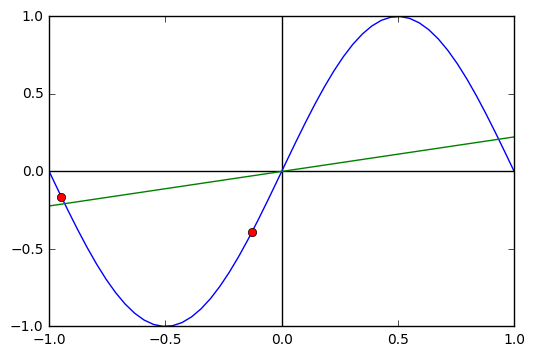

In [5]:
np.random.seed(seed=2)
x_range = np.linspace(-1, 1, 50)
x1 = np.random.uniform(-1, 1, 1)
y1 = np.sin(np.pi * x1)
x2 = np.random.uniform(-1, 1, 1)
y2 = np.sin(np.pi * x2)
a = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x_range, np.sin(np.pi * x_range))
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot(x_range, a * x_range)

# Now let's actually look at  $\mathcal H_2: h(x)=ax + b$

# Since hypothesis can go exactly through the two points the mean squared error on two the examples is 0. The best that a line that can go through the two points are ones where $a$ and $b$ are defined as:

# <center>$\hat a=\frac{y_2-y_1}{x_2-x_1}$</center>
# <center>$\hat b=y_1-\hat ax_1$ or $\hat b=y_2-\hat ax_2$</center>

# To see the derivation of these constants just check out this [wikipedia link](https://en.wikipedia.org/wiki/Simple_linear_regression#Derivation_of_simple_regression_estimators)

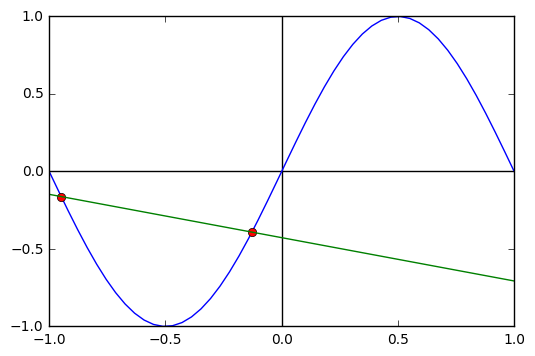

In [6]:
np.random.seed(seed=2)
x_range = np.linspace(-1, 1, 50)
x1 = np.random.uniform(-1, 1, 1)
y1 = np.sin(np.pi * x1)
x2 = np.random.uniform(-1, 1, 1)
y2 = np.sin(np.pi * x2)
a = (y2 - y1) / (x2 - x1)
b = y2 - a * x2

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x_range, np.sin(np.pi * x_range))
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot(x_range, a * x_range + b)

# Now let's actually look at  $\mathcal H_3: h(x)=ax^2$

# Since achieving this hypothesis is not intuitive as the previous ones we'll just skip to the derivation:

# <center>minimize $E_{in}$</center>
# <center>$E_{in}=\sum_{i=1}^2\bigl(y_i - ax_i^2\bigr)^2$</center>
# <center>$\frac{\partial E_{in}}{\partial a}=-2\sum_{i=1}^2  x_i^2(y_i - ax_i^2) = 0$</center>
# <center>$\frac{\partial E_{in}}{\partial a}=\sum_{i=1}^2x_i^2y_i - a\sum_{i=1}^2 x_i^4 = 0$</center>
# <center>$x_1^2y_1 + x_2^2y_2 = a(x_1^4+x_2^4)$</center>
# <center>$\hat a=\frac{x_1^2y_1 + x_2^2y_2}{x_1^4 + x_2^4}$</center>


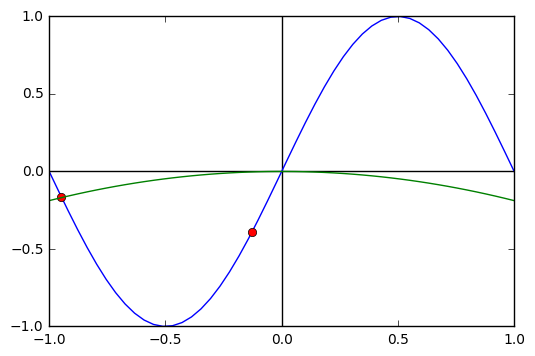

In [7]:
np.random.seed(seed=2)
x_range = np.linspace(-1, 1, 50)
x1 = np.random.uniform(-1, 1, 1)
y1 = np.sin(np.pi * x1)
x2 = np.random.uniform(-1, 1, 1)
y2 = np.sin(np.pi * x2)
a = (x1**2 * y1 + x2**2 * y2) / (x1**4 + x2**4)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x_range, np.sin(np.pi * x_range))
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot(x_range, a  * x_range ** 2)

# Now let's actually look at  $\mathcal H_4: h(x)=ax^2 + b$

# Since achieving this hypothesis is not intuitive as the previous ones we'll just skip to the derivation:

# <center>minimize $E_{in}$</center>
# <center>$E_{in}=\sum_{i=1}^2\bigl(y_i - ax_i^2 - b\bigr)^2$</center>
# <center>$\frac{\partial E_{in}}{\partial b}=-2\sum_{i=1}^2 (y_i - ax_i^2 - b) = 0$</center>
# <center>$\frac{\partial E_{in}}{\partial b}=\sum_{i=1}^2 (y_i - ax_i^2 - b) = 0$</center>
# <center>$\sum_{i=1}^2 y_i - a\sum_{i=1}^2x_i^2 - \sum_{i=1}^2b = 0$</center>
# <center>$ y_1 + y_2 - ax_1^2 - ax_2^2 = 2b$</center>
# <center>$ \hat b = \frac{y_1 + y_2 - \hat a(x_1^2 + x_2^2)}{2}$</center>


# <center>$\frac{\partial E_{in}}{\partial a}=-2\sum_{i=1}^2  x_i^2(y_i - ax_i^2 - b) = 0$</center>
# <center>$\frac{\partial E_{in}}{\partial a}=\sum_{i=1}^2x_i^2y_i - a\sum_{i=1}^2 x_i^4 -b\sum_{i=1}^2 x_i^2 = 0$</center>
# <center>$x_1^2y_1 + x_2^2y_2 - b(x_1^2+x_2^2)= a(x_1^4+x_2^4)$</center>
# <center>$\hat a=\frac{x_1^2y_1 + x_2^2y_2 - \hat b(x_1^2+x_2^2)}{x_1^4 + x_2^4}$</center>

# Solving simultaneously $\hat a$ and $\hat b$ in terms of $x$ and $y$ yields:

# <center>$\hat a = \frac{2(x_1^2y_1 + x_2^2y_2) - (x_1^2+x_2^2)(y_1 + y_2)}{2(x_1^4+x_2^4)-(x_1^2+x_2^2)^2}$</center>
# <center>$\hat b = \frac{(y_1 + y_2)(x_1^4+x_2^4) - (x_1^2+x_2^2)(x_1^2y_1 + x_2^2y_2)}{2(x_1^4+x_2^4)-(x_1^2+x_2^2)^2}$</center>

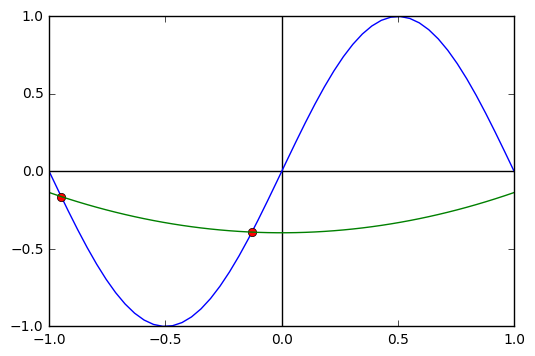

In [8]:
np.random.seed(seed=2)
x_range = np.linspace(-1, 1, 50)
x1 = np.random.uniform(-1, 1, 1)
y1 = np.sin(np.pi * x1)
x2 = np.random.uniform(-1, 1, 1)
y2 = np.sin(np.pi * x2)

i = (x1**2 + x2**2)
j = (y1 + y2)
k = (x1**4 + x2**4)
m = (x1**2 * y1 + x2**2 * y2)

a = (2 * m - i * j) / (2 * k - i ** 2)
b = (j * k - i * m) / (2 * k - i ** 2)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x_range, np.sin(np.pi * x_range))
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot(x_range, a  * x_range ** 2 + b)

# Now to calculate $\bar g(x)$.  Since,

# <center>$\bar g(x) \approx \frac{1}{K}\sum_{k=1}^K g^{(\mathcal D_k)}(x)$</center>

# <center>$g^{(\mathcal D_k)}(x) = \hat a^{(\mathcal D_k)}x$</center>
# <center>$\bar g(x) \approx \frac{1}{K}\sum_{k=1}^K \hat a^{(\mathcal D_k)}x$</center>
# <center>$\bar g(x) \approx  \bar ax$</center>

# where $\bar a$ is the average of all the $\hat a^{(\mathcal D_k)}$ calculated by the random points:

# <center>$\hat a^{(\mathcal D_k)}=\frac{x_1^{(\mathcal D_k)}y_1^{(\mathcal D_k)} + x_2^{(\mathcal D_k)}y_2^{(\mathcal D_k)}}{(x_1^{(\mathcal D_k)})^2 + (x_2^{(\mathcal D_k)})^2}$</center>

# Now we develop a function that calculates a list of $\hat a^{\mathcal D_1}, \hat a^{\mathcal D_1}, ... \hat a^{\mathcal D_K}$ so that we can generate $\bar a$, $\bar g(x)$, bias and variance.

In [9]:
def get_a_hat_list(K = 10000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
    """
    a_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2)

    a_hat_list = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2) # K a_hats
    
    return a_hat_list

a_hat_list = get_a_hat_list() # save for a_bar, g_bar, bias and variance
a_bar = np.mean(a_hat_list)

print("g_bar(x) = {}x".format(round(a_bar, 2)))


g_bar(x) = 1.42x


# $\bar g(x)=1.43x$ hence the answer is: 
# <center>[e] None of the above</center>

<br><br>

# 5. What is the closest value to the bias in this case?
# <center>[a] $0.1$</center>
# <center>[b] $0.3$</center>
# <center>[c] $0.5$</center>
# <center>[d] $0.7$</center>
# <center>[e] $1.0$</center>

# <center>$bias = \mathbb E_x\bigl(bias(x)\bigr)$</center>
# <center>$bias(x) = \bigl(\bar g(x) − f(x)\bigr)^2$</center>
# <center>$bias = \mathbb E_x\bigl[\bigl(\bar g(x) − f(x)\bigr)^2\bigr]$</center>
# <center>$bias = \frac{1}{|\mathcal X|}\sum _{x\in \mathcal{X}}\bigl(\bar g(x) − f(x)\bigr)^2$</center>
# <center>$bias = \frac{1}{|\mathcal X|}\sum _{x\in \mathcal{X}}\bigl(1.43x − sin(\pi x)\bigr)^2$</center>

In [10]:
x_range = np.linspace(-1, 1, 1000)
bias = np.mean((1.43 * x_range - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))

bias = 0.27


# Since the $bias = 0.27$:
# <center>The closest value to the bias is [b] $0.3$</center>

# 6. What is the closest value to the variance in this case?
# <center>[a] $0.2$</center>
# <center>[b] $0.4$</center>
# <center>[c] $0.6$</center>
# <center>[d] $0.8$</center>
# <center>[e] $1.0$</center>

# <center>$variance = \mathbb E_x\bigl(variance(x)\bigr)$</center>
# <center>$variance(x) = \mathbb E_{\mathcal D}\bigl[\bigl(g^{(\mathcal D)}(x) − \bar g(x)\bigr)^2\bigr]$</center>
# <center>$variance(x) = \frac{1}{K}\sum_{k=1}^K\bigl(g^{(\mathcal D_k)}(x) − \bar g(x)\bigr)^2$</center>

# <center>$variance = \mathbb E_x\bigl[\frac{1}{K}\sum_{k=1}^K\bigl(g^{(\mathcal D_k)}(x) − \bar g(x)\bigr)^2\bigr]$</center>
# <center>$variance = \frac{1}{|\mathcal X|}\sum _{x\in \mathcal{X}}\bigl[\frac{1}{K}\sum_{k=1}^K\bigl (g^{(\mathcal D_k)}(x) − \bar g(x)\bigr)^2\bigr]$</center>
# <center>$variance = \frac{1}{|\mathcal X|K}\sum _{x\in \mathcal{X}}\sum_{k=1}^K\bigl (g^{(\mathcal D_k)}(x) − \bar g(x)\bigr)^2$</center>
# <center>$variance = \frac{1}{|\mathcal X|K}\sum _{x\in \mathcal{X}}\sum_{k=1}^K\bigl (\hat a^{(\mathcal D_k)}x − \bar g(x)\bigr)^2$</center>

# The fastest way to take compute this multiple average is to take the outer product of the list of $\hat a^{(\mathcal D_k)}$ and $\mathcal X$ to get a matrix of multiple hypothesis $\mathcal D_k$ across the range of $\mathcal X$ per row, then subtract $\bar g(x)$ from each row, square it, then take mean the resulting matrix.

In [11]:
variance = np.mean((np.outer(a_hat_list, x_range) - a_bar * x_range)**2)
print("variance = {}".format(round(variance, 2)))

variance = 0.23


# Since the $variance = 0.23$ the answer is [a] $0.2$

<br>

<br>

a = 0.7695400038169933
b = -0.004326137048003267


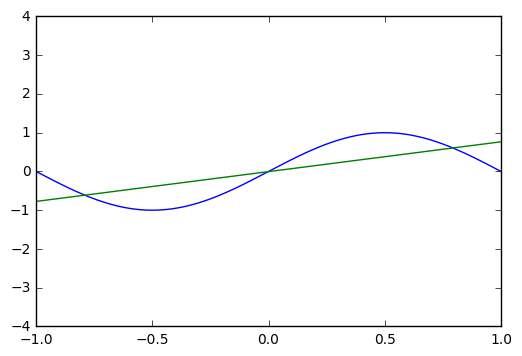

In [12]:
def get_g_list(D = 100000):
    x1 = np.random.uniform(-1, 1, D)
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, D)
    y2 = np.sin(np.pi * x2)

    g_list = (y2 - y1) / (x2 - x1)
    int_list = y2 - g_list * x2
    
    return g_list, int_list

g_list, int_list = get_g_list()

a = np.mean(g_list)
b = np.mean(int_list)
print("a = {}".format(a))
print("b = {}".format(b))
plt.ylim((-4,4))
plt.plot(x_range, np.sin(np.pi * x_range))
plt.plot(x_range, a * x_range + b)

# 7. Now, let’s change $\mathcal H$. Which of the following learning models has the least expected value of out-of-sample error?
# <center>[a] Hypotheses of the form $h(x) = b$</center>
# <center>[b] Hypotheses of the form $h(x) = ax$</center>
# <center>[c] Hypotheses of the form $h(x) = ax + b$</center>
# <center>[d] Hypotheses of the form $h(x) = ax^2$</center>
# <center>[e] Hypotheses of the form $h(x) = ax^2 + b$</center>

# Since $\mathbb E_{\mathcal D}\bigl[E_{out}(g^{(\mathcal D)}) \bigr] = bias + variance$.
# All we have to do is calculate the bias and variance for each scenario.
# Lucklily we already have all the calculations worked out!!!


# For $h(x) = b$:

In [13]:
def get_b_hat_list(K = 10000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
    """
    b_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2)

    b_hat_list = (y2 + y1) / 2 # K b_hats
    
    return b_hat_list

b_hat_list = get_b_hat_list()
b_bar = np.mean(b_hat_list)

print("g_bar(x) = {}".format(round(b_bar, 2)))
x_range = np.linspace(-1, 1, 1000)
bias = np.mean((b_bar - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))
variance = np.mean((np.outer(b_hat_list, np.ones(len(b_hat_list))) - b_bar)**2)
print("variance = {}".format(np.round(variance, 2)))
print("E_out = bias + variance = {} + {} = {}".format(np.round(bias, 2), 
                                                         np.round(variance, 2),
                                                         np.round(bias + variance, 2)))

g_bar(x) = -0.0
bias = 0.5
variance = 0.25
E_out = bias + variance = 0.5 + 0.25 = 0.75


# For $h(x) = b \to E_{out} = 0.75$

<br>

# For $h(x) = ax$:

In [14]:
def get_a_hat_list(K = 100000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
    """
    a_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2)

    a_hat_list = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2) # K a_hats
    
    return a_hat_list

a_hat_list = get_a_hat_list()
a_bar = np.mean(a_hat_list)

print("g_bar(x) = {}x".format(round(a_bar, 2)))
x_range = np.linspace(-1, 1, 1000)
bias = np.mean((a_bar*x_range - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))
variance = np.mean((np.outer(a_hat_list, x_range) - a_bar * x_range)**2)
print("variance = {}".format(np.round(variance, 2)))
print("E_out = bias + variance = {} + {} = {}".format(np.round(bias, 2), 
                                                         np.round(variance, 2),
                                                         np.round(bias + variance, 2)))

g_bar(x) = 1.43x
bias = 0.27
variance = 0.23
E_out = bias + variance = 0.27 + 0.23 = 0.51


# For $h(x) = ax \to E_{out} = 0.51$

<br><br>

# For $h(x) = ax + b$:

In [15]:
def get_a_hat_list_and_b_hat_list(K = 100000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
           b_hat_list: an array all the b_hats
    """
    a_hat_list = np.zeros(K)
    b_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2)

    a_hat_list = (y2 - y1) / (x2 - x1) # K a_hats
    b_hat_list = y2 - a_hat_list * x2 # K b_hats
    return (a_hat_list, b_hat_list)

a_hat_list, b_hat_list = get_a_hat_list_and_b_hat_list()

a_bar = np.mean(a_hat_list)
b_bar = np.mean(b_hat_list)

print("g_bar(x) = {}x + {}".format(round(a_bar, 2), round(b_bar, 2)))
x_range = np.linspace(-1, 1, 1000)
bias = np.mean((a_bar*x_range + b_bar - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))
variance = np.mean(((np.outer(a_hat_list, x_range) + np.expand_dims(b_hat_list, 1)) - (a_bar * x_range + b_bar))**2)
print("variance = {}".format(np.round(variance, 2)))
print("E_out = bias + variance = {} + {} = {}".format(np.round(bias, 2), 
                                                         np.round(variance, 2),
                                                         np.round(bias + variance, 2)))

g_bar(x) = 0.77x + -0.0
bias = 0.21
variance = 1.67
E_out = bias + variance = 0.21 + 1.67 = 1.88


# For $h(x) = ax + b \to E_{out} = 1.88$

<br><br>

# For $h(x) = ax^2$:

In [16]:
def get_a_hat_list(K = 100000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
    """
    a_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2)

    a_hat_list = (x1**2 * y1 + x2**2 * y2) / (x1**4 + x2**4) # K a_hats
    return a_hat_list

a_hat_list = get_a_hat_list()
a_bar = np.mean(a_hat_list)
print("g_bar(x) = {}x^2".format(round(a_bar, 2)))
x_range = np.linspace(-1, 1, 200)
bias = np.mean((a_bar*x_range**2 - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))
variance = np.mean((np.outer(a_hat_list, x_range**2) - a_bar * x_range**2)**2)
print("variance = {}".format(np.round(variance, 2)))
print("E_out = bias + variance = {} + {} = {}".format(np.round(bias, 2), 
                                                      np.round(variance, 2),
                                                      np.round(bias + variance, 2)))

g_bar(x) = 0.1x^2
bias = 0.5
variance = 115.0
E_out = bias + variance = 0.5 + 115.0 = 115.5


# For $h(x) = ax^2 \to E_{out} = 115.5$

<br><br>

# For $h(x) = ax^2 + b$:

In [25]:
def get_a_hat_list_and_b_hat_list(K = 100000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
           b_hat_list: an array all the b_hats
    """
    a_hat_list = np.zeros(K)
    b_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1)
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2)
    
    i = (x1**2 + x2**2)
    j = (y1 + y2)
    k = (x1**4 + x2**4)
    m = (x1**2 * y1 + x2**2 * y2)

    a_hat_list = (2 * m - i * j) / (2 * k - i ** 2)
    b_hat_list = (j * k - i * m) / (2 * k - i ** 2)
    return (a_hat_list, b_hat_list)

a_hat_list, b_hat_list = get_a_hat_list_and_b_hat_list()

a_bar = np.mean(a_hat_list)
b_bar = np.mean(b_hat_list)

print("g_bar(x) = {}x^2 + {}".format(round(a_bar, 2), round(b_bar, 2)))

x_range = np.linspace(-1, 1, 1000)

bias = np.mean((a_bar*x_range**2 + b_bar - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))

variance = np.mean(((np.outer(a_hat_list, x_range**2) + np.expand_dims(b_hat_list, 1)) - 
                    (a_bar * x_range**2 + b_bar))**2)

print("variance = {}".format(np.round(variance, 2)))
print("E_out = bias + variance = {} + {} = {}".format(np.round(bias, 2), 
                                                         np.round(variance, 2),
                                                         np.round(bias + variance, 2)))

g_bar(x) = -19.21x^2 + 7.47
bias = 34.54
variance = 2730191.66
E_out = bias + variance = 34.54 + 2730191.66 = 2730226.21


# For $h(x) = ax^2 + b \to E_{out} = 2730226$

# Thus the hypothesis with the smallest $E_{out}$ is $ax$ with an $E_{out} = 0.51$

# The answer is [b]

<br><br><br>

# • VC Dimension

# 8. Assume $q ≥ 1$ is an integer and let $m_{\mathcal H}(1) = 2$. What is the VC dimension of a hypothesis set whose growth function satisfies: $m_{\mathcal H}(N+1) = 2m_{\mathcal H}(N)-\binom{N}{q}$?  Recall that $\binom{M}{m}= 0$ when $m > M$.
# <center>[a] $q − 2$</center>
# <center>[b] $q − 1$</center>
# <center>[c] $q$</center>
# <center>[d] $q + 1$</center>
# <center>[e] None of the above</center>

# The easiest way to solve this problem is to just make a table of $m_{\mathcal H}(N+1)$ for a specific $q$ and compare them to their appropriate $(N+1)^{d_{vc}}$.  
# Since $m_{\mathcal H}(N) \leq N^{d_{vc}}$  Let's pick $q\in\{1,2,3,4,5\}$.  The first five columns represents $m_{\mathcal H}(N+1)$ as a function of $N$ and $q$. The remaining colunms represents alternate VC bounds as a function of $N$ and $d_{vc}$.

$$\begin{array}{c|c|c|c|c|c|c|c|c|c|} 
 & q=1 & q=2 & q=3  & q=4 & q=5  & (N+1)^{5 }& (N+1)^{4} & (N+1)^{3} & (N+1)^{2}& (N+1)^{1}\\ \hline
N=1 & 3  & 4  & 4   & 4   &4   &32    &4    & 4   & 4  &2 \\ \hline
N=2 & 4  & 7  & 8   & 8   &8   &243   &81   & 27  & 9  &3 \\ \hline
N=3 & 5  & 11 & 15  & 16  &16  &1024  &256  & 64  & 16 &4 \\ \hline
N=4 & 6  & 16 & 26  & 31  &32  &3125  &625  & 125 & 25 &5 \\ \hline
N=5 & 7  & 22 & 42  & 57  &63  &7776  &1296 & 216 & 36 &6 \\ \hline
N=6 & 8  & 29 & 64  & 99  &120 &16807 &2401 & 343 & 49 &7 \\ \hline
N=7 & 9  & 37 & 93  & 163 &219 &32768 &4096 & 512 & 64 &8 \\ \hline
N=8 & 10 & 46 & 130 & 256 &382 &59049 &6561 & 729 & 81 &9 \\ \hline
\end{array}$$

# To find the VC dimension we plot the  $q$ column vs. the  $(N+1)^{d_{vc}}$ columns as $N \to \infty$.  Since some VC bounds grows exponentially faster than others we'll plot the logarithm to get a closer look!

In [82]:
from scipy.misc import comb

def make_mH_column(q, maxN=1000):
    """Creates a column of mHs based on q and N"""
    
    mH_list = np.zeros(maxN)
    
    mH = 2
    for N in range(1, maxN+1):
        mH = 2 * mH - comb(N, q)
        mH_list[N-1] = mH
        
    return mH_list    
    

In [83]:
# make q columns
q_1_column = np.log(make_mH_column(q=1))
q_2_column = np.log(make_mH_column(q=2))
q_3_column = np.log(make_mH_column(q=3))
q_4_column = np.log(make_mH_column(q=4))
q_5_column = np.log(make_mH_column(q=5))

q_list = [q_1_column, q_2_column, q_3_column, q_4_column, q_5_column]

# make dvc columns
dvc_1 = np.log(np.arange(2,1002)**1)
dvc_2 = np.log(np.arange(2,1002)**2)
dvc_3 = np.log(np.arange(2,1002)**3)
dvc_4 = np.log(np.arange(2,1002)**4)
dvc_5 = np.log(np.arange(2,1002)**5)

dvc_list = [dvc_1, dvc_2, dvc_3, dvc_4, dvc_5]
title = "$mH$ bounds for $q = {}$"

# Let's compare the $m_{\mathcal H}(N+1)$ bound for $q = 1$ to various $N^{d_{vc}}$

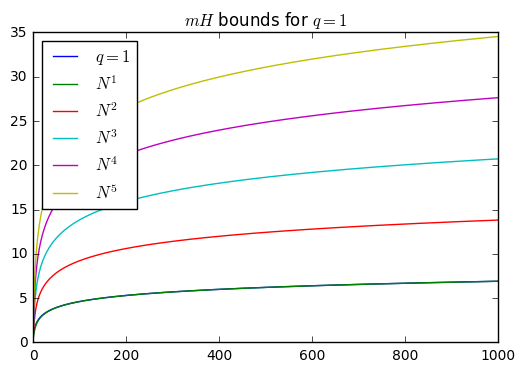

In [84]:
q = 1
plt.title(title.format(q))
plt.plot(np.arange(1,1001), q_list[q-1], label="$q = {}$".format(q))
for dvc in np.arange(1,6):
    plt.plot(np.arange(1,1001), dvc_list[dvc-1], label="$N^{}$".format(dvc))
plt.legend(loc="best")

# For $q = 1$, all of $d_{vc} \in \{1,2,3,4,5\}$ either match or exceeds $m_{\mathcal H}(N+1)$
# The minimum $q$ in the set is $d_{vc}=1$
# Hence for $q = 1,\ min\{d_{vc}\} = 1 = q$

# Let's compare the $m_{\mathcal H}(N+1)$ bound for $q = 2$ to various $N^{d_{vc}}$

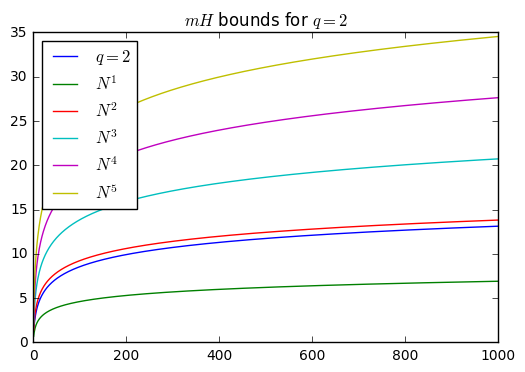

In [85]:
q = 2
plt.title(title.format(q))
plt.plot(np.arange(1,1001), q_list[q-1], label="$q = {}$".format(q))
for dvc in np.arange(1,6):
    plt.plot(np.arange(1,1001), dvc_list[dvc-1], label="$N^{}$".format(dvc))
plt.legend(loc="best")

# For $q = 2$, all of $d_{vc} \in \{2,3,4,5\}$ either match or exceeds $m_{\mathcal H}(N+1)$
# The minimum $q$ in the set is $d_{vc}=2$
# Hence for $q = 2,\ min\{d_{vc}\} = 2 = q$

# Let's compare the $m_{\mathcal H}(N+1)$ bound for $q = 3$ to various $N^{d_{vc}}$

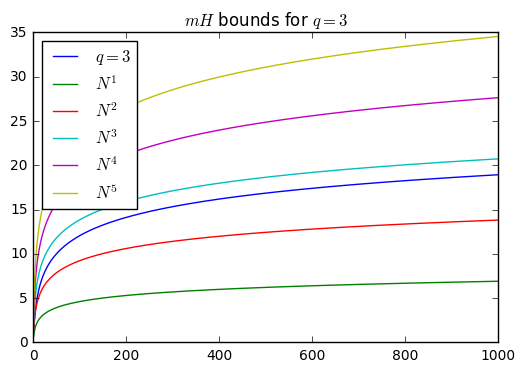

In [86]:
q = 3
plt.title(title.format(q))
plt.plot(np.arange(1,1001), q_list[q-1], label="$q = {}$".format(q))
for dvc in np.arange(1,6):
    plt.plot(np.arange(1,1001), dvc_list[dvc-1], label="$N^{}$".format(dvc))
plt.legend(loc="best")

# For $q = 3$, all of $d_{vc} \in \{3,4,5\}$ either match or exceeds $m_{\mathcal H}(N+1)$
# The minimum $q$ in the set is $d_{vc}=3$
# Hence for $q = 3,\ min\{d_{vc}\} = 3 = q$

# Let's compare the $m_{\mathcal H}(N+1)$ bound for $q = 4$ to various $N^{d_{vc}}$

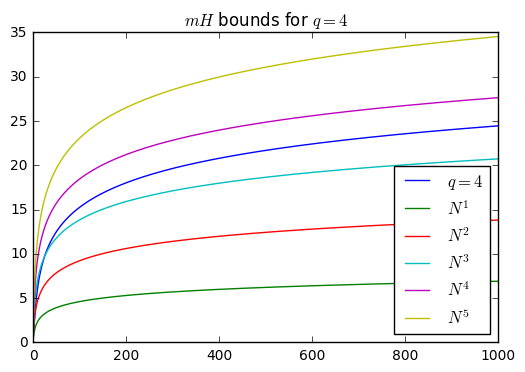

In [87]:
q = 4
plt.title(title.format(q))
plt.plot(np.arange(1,1001), q_list[q-1], label="$q = {}$".format(q))
for dvc in np.arange(1,6):
    plt.plot(np.arange(1,1001), dvc_list[dvc-1], label="$N^{}$".format(dvc))
plt.legend(loc="best")

# For $q = 4$, all of $d_{vc} \in \{4,5\}$ either match or exceeds $m_{\mathcal H}(N+1)$
# The minimum $q$ in the set is $d_{vc}=4$
# Hence for $q = 4,\ min\{d_{vc}\} = 4 = q$

# Let's compare the $m_{\mathcal H}(N+1)$ bound for $q = 5$ to various $N^{d_{vc}}$

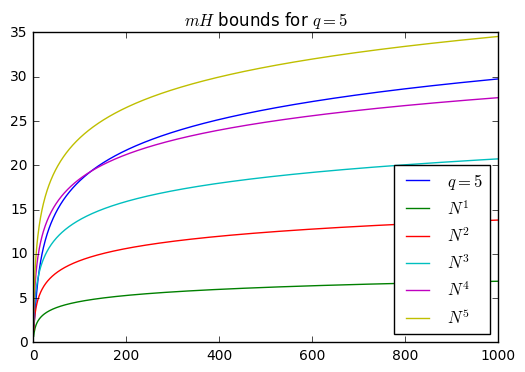

In [88]:
q = 5
plt.title(title.format(q))
plt.plot(np.arange(1,1001), q_list[q-1], label="$q = {}$".format(q))
for dvc in np.arange(1,6):
    plt.plot(np.arange(1,1001), dvc_list[dvc-1], label="$N^{}$".format(dvc))
plt.legend(loc="best")

# For $q = 5$, all of $d_{vc} \in \{5\}$ either match or exceeds $m_{\mathcal H}(N+1)$
# The minimum $q$ in the set is $d_{vc}=5$
# Hence for $q = 5,\ min\{d_{vc}\} = 5 = q$

# Based on these scenarios at high $N$s we see that the VC dimension is:
# <center>[c] q </center>

# 9. For hypothesis sets $\mathcal H_1, \mathcal H_2, ..., \mathcal H_K$ with finite, positive VC dimensions $d_{vc}(\mathcal H_k)$, some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound (the smallest range of values) on the VC dimension of the <u>intersection</u> of the sets: $d_{vc}(\bigcap_{k=1}^K \mathcal H_k)$? (The VC dimension of an empty set or a singleton set is taken as zero)
# <center>[a] $0 ≤ d_{vc}(\bigcap_{k=1}^K \mathcal H_k) ≤\sum_{k=1}^K d_{vc}(\mathcal H_k)$</center>
# <center>[b] $0 ≤ d_{vc}(\bigcap_{k=1}^K \mathcal H_k) ≤ min\{d_{vc}(\mathcal H_k)\}_{k=1}^K$</center>
# <center>[c] $0 ≤ d_{vc}(\bigcap_{k=1}^K \mathcal H_k) ≤ max\{d_{vc}(\mathcal H_k)\}_{k=1}^K$</center>
# <center>[d] $min\{d_{vc}(\bigcap_{k=1}^K \mathcal H_k)\} ≤ d_{vc}(\bigcap_{k=1}^K \mathcal H_k) ≤ max\{d_{vc}(\mathcal H_k)\}_{k=1}^K$</center>
# <center>[e] $min\{d_{vc}(\bigcap_{k=1}^K \mathcal H_k)\} ≤ d_{vc}(\bigcap_{k=1}^K \mathcal H_k) ≤ \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$</center>

# Let's create three hypothesis sets, $\mathcal H_1, \mathcal H_2$ and $\mathcal H_{2'}$


# <center>$\mathcal H_1$ where the breakpoint $k = 2$ and $d_{vc} = 1$</center>

$$\begin{array}{c|c|c} 
 x_1 & x_2 & x_3 \\ \hline
 -  & -  & -     \\ \hline
 -  & -  & +     \\ \hline
 -  & +  & -     \\ \hline
 +  & -  & -     \\ \hline
\end{array}$$
# <center>$\mathcal H_2$ where the breakpoint $k = 2$ and $d_{vc} = 1$</center>

$$\begin{array}{c|c|c} 
 x_1 & x_2 & x_3 \\ \hline
 +  & +  & +     \\ \hline
 +  & +  & -     \\ \hline
 +  & -  & +     \\ \hline
 -  & +  & +     \\ \hline
\end{array}$$

# <center>$\mathcal H_{2'}$ where $d_{vc} = 3$</center>

$$\begin{array}{c|c|c} 
 x_1 & x_2 & x_3 \\ \hline
 -  & -  & -     \\ \hline
 -  & -  & +     \\ \hline
 -  & +  & -     \\ \hline
 +  & -  & -     \\ \hline
 +  & +  & +     \\ \hline
 +  & +  & -     \\ \hline
 +  & -  & +     \\ \hline
 -  & +  & +     \\ \hline
\end{array}$$


# $\bigcap_{k=1}^2 \mathcal H_k = \mathcal H_1 \bigcap \mathcal H_2 = \emptyset$
# $d_{vc}(\emptyset) = 0$

# $\bigcap_{k=1}^{2'} \mathcal H_k = \mathcal H_1 \bigcap \mathcal H_{2'} = \mathcal H_1$
# $d_{vc}(\mathcal H_1) = 1$ 
# since $\{d_{vc}(\mathcal H_k)\}_{k=1}^2 = \{1,3\}$
# $d_{vc}(\mathcal H_1) = 1 \to min\{d_{vc}(\mathcal H_k)\}_{k=1}^2 = 1$

# You cannot get a tighter bound by this since the intersection of any two sets with at least one point in common will be the common points. And since the common points will always be a subset of the union of these points then upper bound $d_vc$ will have to be the minimimum in that set reflecting $d_vc$ of the points that the sets have in common, the worst case being none in common.

# The answer is [b] $0 ≤ d_{vc}(\bigcap_{k=1}^K \mathcal H_k) ≤ min\{d_{vc}(\mathcal H_k)\}_{k=1}^K$


# 10. For hypothesis sets $\mathcal H_1, \mathcal H_2, ..., \mathcal H_K$ with finite, positive VC dimensions $d_{vc}(\mathcal H_k)$, some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound (the smallest range of values) on the VC dimension of the <u>union</u> of the sets: $d_{vc}(\bigcup_{k=1}^K \mathcal H_k)$?
# <center>[a] $0 ≤ d_{vc}(\bigcup_{k=1}^K \mathcal H_k) ≤\sum_{k=1}^K d_{vc}(\mathcal H_k)$</center>
# <center>[b] $0 ≤ d_{vc}(\bigcup_{k=1}^K \mathcal H_k) ≤ K - 1 + \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$</center>
# <center>[c] $min\{d_{vc}(\mathcal H_k)\}_{k=1}^K ≤ d_{vc}(\bigcup_{k=1}^K \mathcal H_k) ≤ \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$</center>
# <center>[d] $max\{d_{vc}(\mathcal H_k)\}_{k=1}^K ≤ d_{vc}(\bigcup_{k=1}^K \mathcal H_k) ≤ \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$</center>
# <center>[e] $max\{d_{vc}(\mathcal H_k)\}_{k=1}^K ≤ d_{vc}(\bigcup_{k=1}^K \mathcal H_k) ≤K-1+ \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$</center>

# Let's create three hypothesis sets, $\mathcal H_1, \mathcal H_2$ and $\mathcal H_{2'}$


# <center>$\mathcal H_1$ where the breakpoint $k = 2$ and $d_{vc} = 1$</center>

$$\begin{array}{c|c|c} 
 x_1 & x_2 & x_3 \\ \hline
 -  & -  & -     \\ \hline
 -  & -  & +     \\ \hline
 -  & +  & -     \\ \hline
 +  & -  & -     \\ \hline
\end{array}$$
# <center>$\mathcal H_2$ where the breakpoint $k = 2$ and $d_{vc} = 1$</center>

$$\begin{array}{c|c|c} 
 x_1 & x_2 & x_3 \\ \hline
 +  & +  & +     \\ \hline
 +  & +  & -     \\ \hline
 +  & -  & +     \\ \hline
 -  & +  & +     \\ \hline
\end{array}$$

# <center>$\mathcal H_{2'}$ where $d_{vc} = 3$</center>

$$\begin{array}{c|c|c} 
 x_1 & x_2 & x_3 \\ \hline
 -  & -  & -     \\ \hline
 -  & -  & +     \\ \hline
 -  & +  & -     \\ \hline
 +  & -  & -     \\ \hline
 +  & +  & +     \\ \hline
 +  & +  & -     \\ \hline
 +  & -  & +     \\ \hline
 -  & +  & +     \\ \hline
\end{array}$$


# $\bigcup_{k=1}^{2'} \mathcal H_k = \mathcal H_1 \bigcup \mathcal H_{2'} = \mathcal H_{2'}$
# $d_{vc}(\mathcal H_{2'}) = 3$
# since $\{d_{vc}(\mathcal H_k)\}_{k=1}^{2'} = \{1,3\}$
# $d_{vc}(\mathcal H_{2'}) = 3 \to max\{d_{vc}(\mathcal H_k)\}_{k=1}^{2'} = 3$

# You cannot get a lower bound than this since the union of any two sets will alway include those sets. And hence will always include the set with the highest $d_{vc}$.  Thus we take the maximum to represent the union.

# $\bigcup_{k=1}^{2} \mathcal H_k = \mathcal H_1 \bigcup \mathcal H_{2} = \mathcal H_{2'}$
# $d_{vc}(\mathcal H_{2'}) = 3$ 
# since $K=2$ and $\{d_{vc}(\mathcal H_k)\}_{k=1}^2 = \{1,1\}$
# $d_{vc}(\mathcal H_{2'}) = 3 \to 1 + 1 + 1 \to 2-1+ \sum_{k=1}^2\{d_{vc}(\mathcal H_k)\} \to$ 
# $K-1+ \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$


# The answer is [e] $max\{d_{vc}(\mathcal H_k)\}_{k=1}^K ≤ d_{vc}(\bigcup_{k=1}^K \mathcal H_k) ≤K-1+ \sum_{k=1}^K\{d_{vc}(\mathcal H_k)\}$
